# 1.4.2 EPCE and ZPR using FP: Post-processing the inputs.
In this step we would write a post-processing script to compute electron-phonon coupling energies (EPCE), zero-point renormalization (ZPR) or renormalization at finite temperature.

We need electron-phonon from finite difference (epfd) module, numpy and os. Lets import them first.


In [1]:
import os
import numpy as np
import pyepfd.epfd as ep

                                                 
          ███████████                            
         ░░███░░░░░███                           
          ░███    ░███ █████ ████                
          ░██████████ ░░███ ░███                 
          ░███░░░░░░   ░███ ░███                 
          ░███         ░███ ░███                 
          █████        ░░███████                 
         ░░░░░          ░░░░░███                 
                        ███ ░███                 
                       ░░██████                  
                        ░░░░░░                   
 ██████████ ███████████  ███████████ ██████████  
░░███░░░░░█░░███░░░░░███░░███░░░░░░█░░███░░░░███ 
 ░███  █ ░  ░███    ░███ ░███   █ ░  ░███   ░░███
 ░██████    ░██████████  ░███████    ░███    ░███
 ░███░░█    ░███░░░░░░   ░███░░░█    ░███    ░███
 ░███ ░   █ ░███         ░███  ░     ░███    ███ 
 ██████████ █████        █████       ██████████  
░░░░░░░░░░ ░░░░░        ░░░░░       ░░░░░░░░░░   


Now we will define the directories where all input files are present as well as where the outputs would be written. Within the electron-phonon class there are objects "inp_dir" and "out_dir" for that purpose. Our input directory is the current one, i.e. "./", lets name the output directory as "epfd_out". We further tell that if epfd_directory does not exist then it will create that directory


In [2]:
ep.inp_dir = "./"
ep.out_dir = "epfd_out"
if not os.path.isdir(ep.out_dir):
   os.system("mkdir "+ep.out_dir)

Now we will define a linear temperature grid from 0.0 K to 1100.0 K with 111 points in it. We will use temp_grid method available within ep class defined above. 

In [3]:
T = ep.temp_grid( T_start = 0.0, T_end = 1100.0, NT = 111 )
print(T)

[   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.  110.
  120.  130.  140.  150.  160.  170.  180.  190.  200.  210.  220.  230.
  240.  250.  260.  270.  280.  290.  300.  310.  320.  330.  340.  350.
  360.  370.  380.  390.  400.  410.  420.  430.  440.  450.  460.  470.
  480.  490.  500.  510.  520.  530.  540.  550.  560.  570.  580.  590.
  600.  610.  620.  630.  640.  650.  660.  670.  680.  690.  700.  710.
  720.  730.  740.  750.  760.  770.  780.  790.  800.  810.  820.  830.
  840.  850.  860.  870.  880.  890.  900.  910.  920.  930.  940.  950.
  960.  970.  980.  990. 1000. 1010. 1020. 1030. 1040. 1050. 1060. 1070.
 1080. 1090. 1100.]


Now we will define a "homo" class with the available input files using frozen-phonon harmonic class (fph) available within epfd object (imported here as ep). HOMO is 2-fold degenerate at equilibrium geometry, however, when we displace it degeneracies may be lost. In the displaced cooddinates we will assume them to be degenerate if the energy difference is less than 0.002 eV.

After defining the homo class, we will compute the renormalized band energies using a method named eigval_at_temp. This will create a list of renormalized eigenvalues / band energies and store them within an object homo.renorm_eigval

In [4]:
homo = ep.fph(phonon_info_file='enmfdphonon.xml',
             eigval_file = "homo.eigval.dat",
             overlap_file = "orbital-0.overlap",
             degeneracy_cutoff = 0.002,
             output_prefix = "homo"
            )
homo.eigval_at_temp(T)

#print("\nRenormalized Eigenvalues for band 7 & 8\n")
#print(homo.renorm_eigval)
# deleting the homo object for completeing file writing
del homo

Process-id0: Time spent on read_pyepfd_info class: 0.0012581348419189453 s.
ZPR (meV) for homo:
Orbital-7  49.63074301665274
Orbital-8  58.95381558176698


Similarly we can compute the renormalized energies for LUMO. We do not need overlap_file as it is singly degenerate at equilibrium geometry. Neither we do need the degeneracy cutoff.

In [5]:
lumo = ep.fph(
             phonon_info_file='enmfdphonon.xml',
             eigval_file = "lumo.eigval.dat",
             output_prefix = "lumo"
               )
lumo.eigval_at_temp(T)

#print("\nRenormalized Eigenvalues for band 9\n")
#print(lumo.renorm_eigval)
# deleting lumo object for completing file writing
del lumo

Process-id0: Time spent on read_pyepfd_info class: 0.0004923343658447266 s.
ZPR (meV) for lumo:
Orbital-9  -88.48019533017887


Now we have obtained two ZPR values for HOMO, 49 meV and 59 meV. This is because of splitting of degeneracy. The average HOMO renormalization without considering the splitting would be (49+59)/2 meV = 54 meV.  
Now let us have a look at the directory epfd_out


In [6]:
%%bash
ls epfd_out/

homo.epce.dat
homo.pyepfd.log
homo.tscan.eigval
lumo.epce.dat
lumo.pyepfd.log
lumo.tscan.eigval


homo.epce.dat file contains the electron-phonon coupling energy for band 7 and 8 along each mode. homo.tscan.eigval contains the renormalized band-energies.  

In [7]:
homo_epce_file = open("epfd_out/homo.epce.dat","r").read()
print(homo_epce_file)    

# Column-1 ==> Normal Mode Number
# Column-2 ==> Normal Mode Frequency (cm-1)calculated based on normal mode hessian.
# Column-3 ==> EPCE: value(meV) [percentage] for Orbital-7
# Column-4 ==> EPCE: value(meV) [percentage] for Orbital-8
     6      676.086354     10.7385 [  10.818 ]       20.0616 [  17.015 ]  
     7      676.087602     10.7386 [  10.818 ]       20.0617 [  17.015 ]  
     8     1345.456097    0.499236 [   0.503 ]      0.499236 [   0.423 ]  
     9     2361.832806     77.2852 [  77.860 ]       77.2852 [  65.547 ]  
#   EPCE SUM (meV) =        99.2615 [ 100.000 ]       117.908 [ 100.000 ]  
#      ZPR (meV) =          49.6307 [ 100.000 ]       58.9538 [ 100.000 ]  



In [8]:
%%bash
head epfd_out/homo.tscan.eigval

# Thermally averaged energies (eV) are sorted in increasing order.
# Column-1 ==> Temperature(K)
# Column-2 ==>  Orbital-7
# Column-3 ==>  Orbital-8
      0.00      -10.459491      -10.450168 
     10.00      -10.459491      -10.450168 
     20.00      -10.459491      -10.450168 
     30.00      -10.459491      -10.450168 
     40.00      -10.459491      -10.450168 
     50.00      -10.459491      -10.450168 


We can plot the band gap renormalization as a function of temperature using tscan.eigval files.

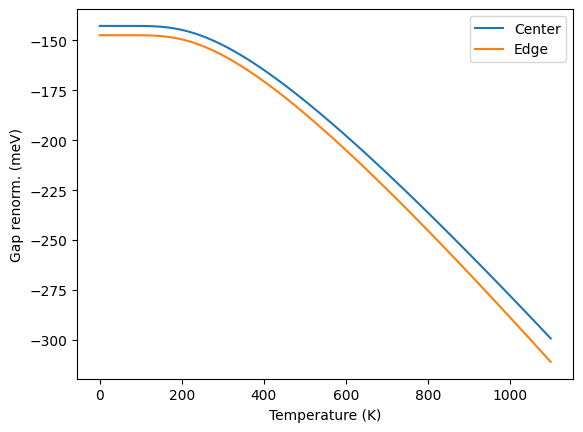

In [9]:
import numpy as np
import matplotlib.pyplot as plt
static_gap = 9.5794   ### in eV; clamped nuclei
homo = np.genfromtxt("epfd_out/homo.tscan.eigval")
temp = homo[:,0] #First column is temperature
### Average energy of orbitals 7 and 8; called center gap
homo_center = 0.5*(homo[:,1] + homo[:,2])
homo_edge = homo[:,2]
# 2nd column of the following file have LUMO energies
lumo = np.genfromtxt("epfd_out/lumo.tscan.eigval")[:,1]
#Renormalized band gap without considering degeneracy lifting
gap_center = lumo - homo_center
renorm_center = (gap_center - static_gap) * 1000 #eV to meV
#Renormalized band gap when splitting is considered; i.e.
# shortest band gap
gap_edge = lumo - homo_edge
renorm_edge = (gap_edge - static_gap) * 1000 #ev to meV

## plotting
plt.xlabel("Temperature (K)")
plt.ylabel("Gap renorm. (meV)")
plt.plot(temp,renorm_center,label="Center")
plt.plot(temp,renorm_edge,label="Edge")
plt.legend()
plt.show()